# Лабораторна робота №4
## Обробка зображень та робота з наборами файлів цифрових зображень

## Мета: Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

# Завдання 1. Робота з набором файлів.
## 1) Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
## 2) Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
## - ім’я файлу;
## - кольорову модель;
## - формат;
## - кількість каналів у зображенні;
## - розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;
## - ширину картинки;
## - висоту картинки;
## - повний шлях до файлу;
## - зменшене зображення.

## Зауваження:

## а) Якщо файл не є зображенням не додавати інформацію про нього в датафрейм.

## б) Для обробки набору файлів можете скористатися вбудованими модулями glob (https://docs.python.org/3/library/glob.html), або zipfile https://docs.python.org/3/library/zipfile.html

## в) Для відображення картинки в датафреймі можете скористатись методом, описаним в наступному матеріалі

,File Name,Format,Color Mode,Channels,File Size (MB),Width,Height,Full Path,Resized Image
0,230426135537-sand-cat-1.jpg,JPEG,RGB,3,4.09,4104,3078,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\230426135537-sand-cat-1.jpg,
1,360_F_565735615_D2uX6alZuUOu77bJkfh5JKJbKmyZmxNu.jpg,JPEG,RGB,3,0.06,540,360,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\360_F_565735615_D2uX6alZuUOu77bJkfh5JKJbKmyZmxNu.jpg,
2,beautiful-cats-pictures-xwf07shnbxdspyde.jpg,JPEG,RGB,3,0.12,1600,1200,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\beautiful-cats-pictures-xwf07shnbxdspyde.jpg,
3,beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg,JPEG,RGB,3,0.09,1200,901,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg,
4,blob-09636982-a21a-494b-bbe4-3692c2720ae3.jpeg,JPEG,RGB,3,0.06,1280,720,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\blob-09636982-a21a-494b-bbe4-3692c2720ae3.jpeg,
5,cute-cat-photos-1593441022.jpg,JPEG,RGB,3,0.04,640,637,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\cute-cat-photos-1593441022.jpg,
6,cute-photos-of-cats-looking-at-camera-1593184780.jpg,JPEG,RGB,3,0.19,980,980,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\cute-photos-of-cats-looking-at-camera-1593184780.jpg,
7,download (1).jpeg,JPEG,RGB,3,0.01,275,183,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\download (1).jpeg,
8,download (2).jpeg,JPEG,RGB,3,0.00,300,168,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\download (2).jpeg,
9,download (3).jpeg,JPEG,RGB,3,0.01,275,183,C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images\download (3).jpeg,

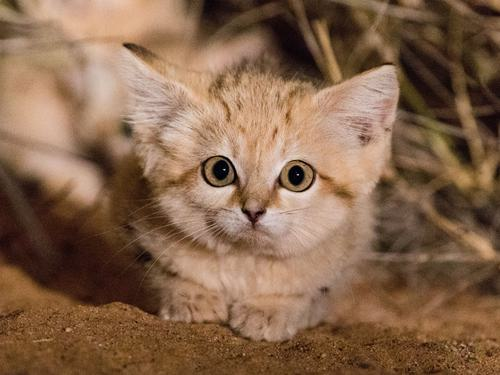
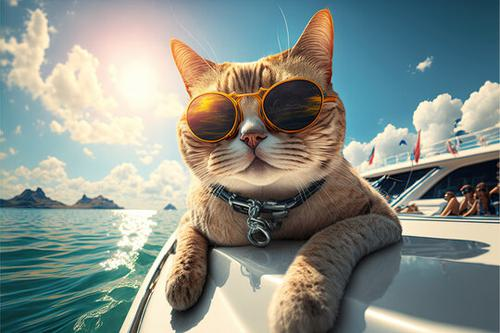
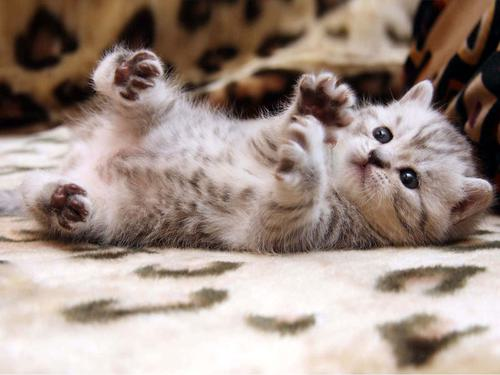
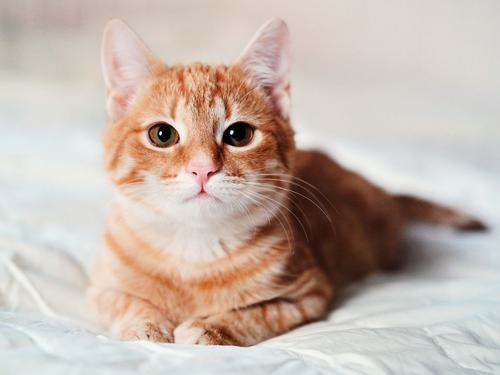
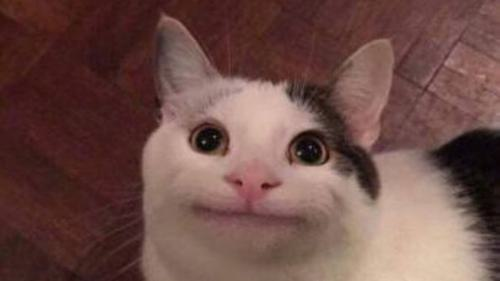
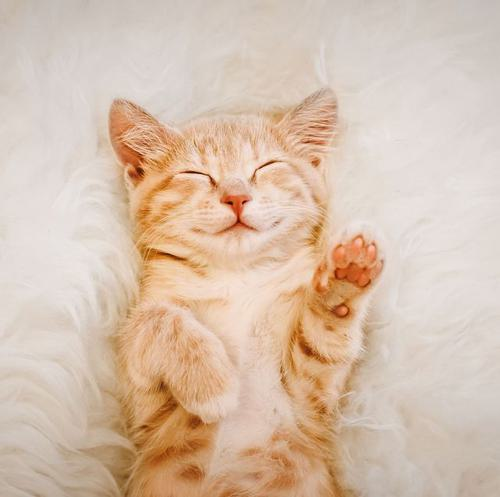
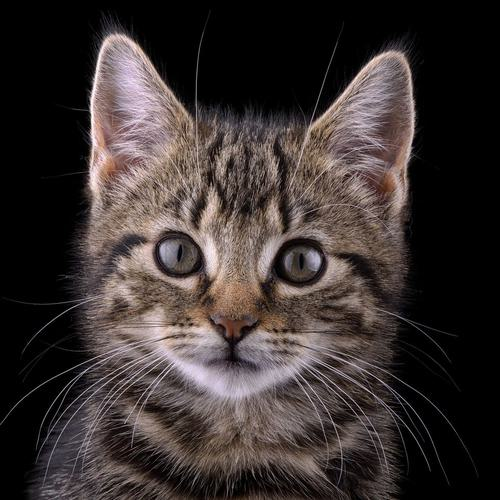
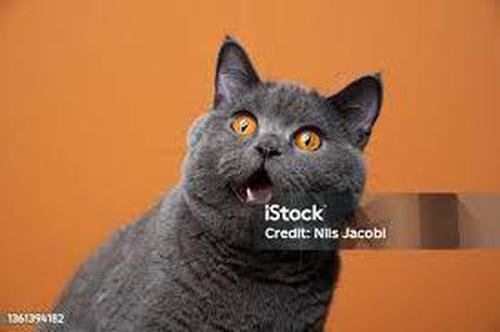
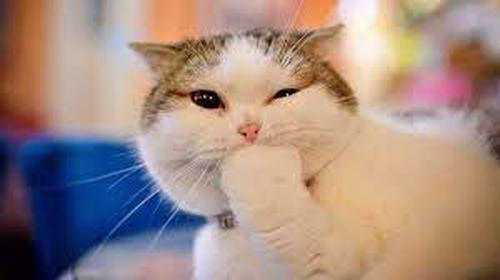
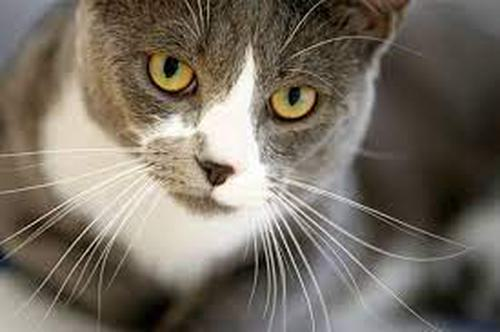
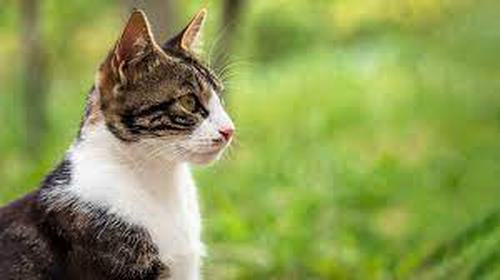
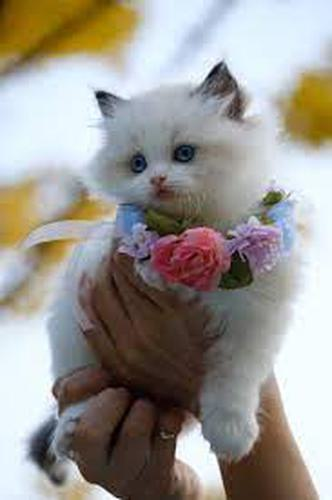
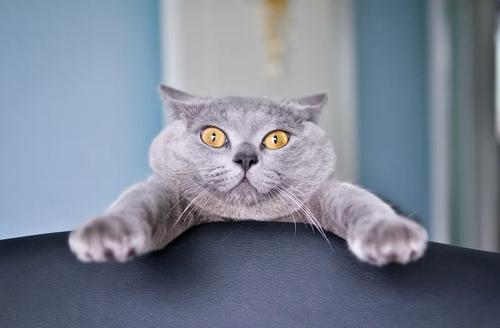
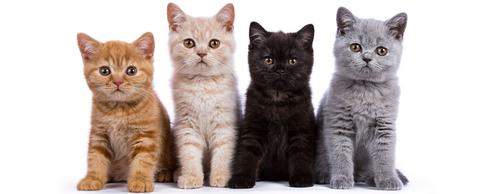
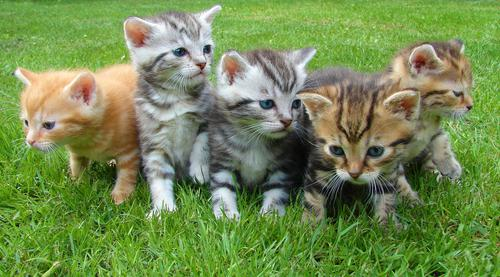
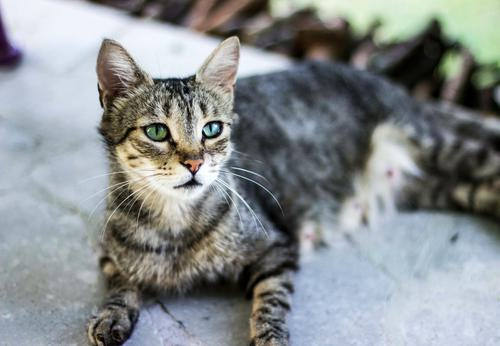

In [18]:
from PIL import Image
import os
import glob
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO


def image_info(directory):
    image_data = []

    image_files = glob.glob(os.path.join(directory, '*'))

    for file in image_files:
        try:
            with Image.open(file) as img:
                file_name = os.path.basename(file)
                image_format = img.format
                mode = img.mode
                channels = len(img.getbands())
                file_size = os.path.getsize(file) / (1024 * 1024)
                file_size = round(file_size, 2)
                width, height = img.size
                full_path = os.path.abspath(file)

                if width > height:
                    new_width = 500
                    new_height = int((new_width / width) * height)
                else:
                    new_height = 500
                    new_width = int((new_height / height) * width)

                resized_img = img.resize((new_width, new_height), Image.LANCZOS)

                buffered = BytesIO()
                resized_img.save(buffered, format="JPEG")
                img_str = base64.b64encode(buffered.getvalue()).decode()

                img_tag = f'<img src="data:image/jpeg;base64,{img_str}">'

                image_data.append({
                    'File Name': file_name,
                    'Format': image_format,
                    'Color Mode': mode,
                    'Channels': channels,
                    'File Size (MB)': file_size,
                    'Width': width,
                    'Height': height,
                    'Full Path': full_path,
                    'Resized Image': img_tag
                })
        except (IOError, SyntaxError):
            pass

    df = pd.DataFrame(image_data)
    return df


folder_path = r'C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images'

image_dataframe = image_info(folder_path)

display(HTML(image_dataframe.to_html(escape=False)))

# Завдання 2 Створити функцію, що в якості аргумента приймає:
## - шлях до папки;
## - назва вихідного зображення;
## - кількість зображень в рядку;
## - кількість зображень в стовпчику і повертає зображення постера.
## Вважаємо, що постер є прямокутним і число картинок в постері a  b, де а – число стовпчиків, а b – число рядків.
## Зауваження:
## 1) Створити функцію, що перетворює картинку на квадрат з максимально можливим розміром сторони (наприклад, якщо картинка розміром 800533, то вихідний розмір повинен бути 533533). Обрізаємо картинку з двох країв, тобто розмір розраховуємо від центру.
## 2) Всі картинки, з яких створено постер, повинні бути однакового розміру, Тобто після обрізки необхідно змінити розмір, наприклад, на 500500.
## 3) Картинки для додавання в постер обирати випадковим чином. Картинки можуть повторюватись.
## 4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого, пурпурного або голубого кольорів, що також обираються випадковим чином та можуть повторюватись.
## 5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.
## 6) Використовувати зображення, що знаходяться в папці, що сформована в завданні 1
## 7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.

In [26]:
from PIL import Image, ImageEnhance
import os
import random


def create_poster(folder_path, output_name, images_in_row, images_in_column):
    def apply_random_color_filter(image):
        color_filters = [
            'color', 'contrast', 'brightness', 'sharpness', 'sharpness', 'color'
        ]
        random_filter = random.choice(color_filters)
        enhanced_image = ImageEnhance.Color(image).enhance(3.0)
        saturation_factor = random.uniform(0.5, 2.0)

        if random_filter == 'color':
            enhanced_image = ImageEnhance.Color(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'contrast':
            enhanced_image = ImageEnhance.Contrast(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'brightness':
            enhanced_image = ImageEnhance.Brightness(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'sharpness':
            enhanced_image = ImageEnhance.Sharpness(enhanced_image).enhance(3.0 * saturation_factor)

        return enhanced_image

    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)
                   if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(
            ".jfif") or filename.endswith(".jpeg")]

    poster_width = images_in_row * 500
    poster_height = images_in_column * 500
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(images_in_row):
        for j in range(images_in_column):
            if image_paths:
                random_image_path = random.choice(image_paths)
                image_paths.remove(random_image_path)

                img = Image.open(random_image_path)
                width, height = img.size
                size = min(width, height)
                left = (width - size) / 2
                top = (height - size) / 2
                right = (width + size) / 2
                bottom = (height + size) / 2
                img = img.crop((left, top, right, bottom))
                img = img.resize((500, 500))

                img = apply_random_color_filter(img)

                poster.paste(img, (i * 500, j * 500))
    poster.save(output_name)

## First try

In [21]:
folder_path = r'C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images'
output_name = "firstPoster.jpg"
images_in_row = 3
images_in_column = 2

create_poster(folder_path, output_name, images_in_row, images_in_column)

## Second try

In [22]:
folder_path = r'C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images'
output_name = "secondPoster.jpg"
images_in_row = 3
images_in_column = 3

create_poster(folder_path, output_name, images_in_row, images_in_column)

## Third try

In [23]:
folder_path = r'C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images'
output_name = "thirdPoster.jpg"
images_in_row = 2
images_in_column = 2

create_poster(folder_path, output_name, images_in_row, images_in_column)

## Fourth try

In [24]:
folder_path = r'C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images'
output_name = "fourthPoster.jpg"
images_in_row = 2
images_in_column = 3

create_poster(folder_path, output_name, images_in_row, images_in_column)

## Fifth try

In [27]:
folder_path = r'C:\Users\polma\Desktop\3 course\1 semester\Python\Lab4\images'
output_name = "fifthPoster.jpg"
images_in_row = 3
images_in_column = 5

create_poster(folder_path, output_name, images_in_row, images_in_column)

## [Git Hub](https://github.com/Polmaetgia/Lab5)

## Висновок
В процесі вивчення обробки зображень та роботи з наборами файлів цифрових зображень за допомогою бібліотек Pillow та/або OpenCV було отримано значні знання та навички у цій області. Використання цих бібліотек дозволило ефективно працювати з різними аспектами обробки зображень, такими як зчитування, збереження, зміна розміру, фільтрація та візуалізація.

Бібліотека Pillow виявилася потужним інструментом для базових операцій зображень, таких як відкриття та збереження файлів у різних форматах, зміна розміру та кольору зображення, а також робота з різними ефектами та фільтрами. Зокрема, з її допомогою можна легко автоматизувати прості завдання обробки зображень.

OpenCV відзначається своєю потужною функціональністю для складніших завдань обробки зображень, таких як розпізнавання облич, виявлення об'єктів та робота з відеопотоками. Вона надає розширені інструменти для обробки та аналізу зображень, що робить її ідеальним вибором для проектів, пов'язаних з комп'ютерним зором.

Працюючи з наборами файлів цифрових зображень, вдалося оптимізувати процес обробки та аналізу даних. Це важливо, оскільки дозволяє ефективно застосовувати операції до багатьох зображень одночасно, що є ключовим елементом у великих проектах та дослідженнях.

Усього вивчено та вдосконалено широкий спектр методів та технік обробки зображень, що може бути успішно використано в різноманітних областях, таких як комп'ютерний зір, медичне зображення, візуальна аналітика та інші.